# Actividad 3
En el siguiente apartado se va a realizar la Actividad 3

# Redes neuronales para clasificación de imágenes

In [30]:
import pickle

import numpy as np

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [31]:
with open('preprocessed_emojis.pkl', 'rb') as f:
    preprocessed_emojis = pickle.load(f)

print (f'Imagenes cargadas: {len(preprocessed_emojis)}')

#Organiza los datos en matrices numpy
labels = ['Angry', 'Happy', 'Poo', 'Sad', 'Surprised']

X = np.array([img.flatten() for img, _ in preprocessed_emojis])
y = np.array([labels.index(label) for _, label in preprocessed_emojis])

print("Forma de X:", X.shape)
print("Forma de y:", y.shape)

Imagenes cargadas: 2530
Forma de X: (2530, 1024)
Forma de y: (2530,)


In [32]:
#Divide los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
y_train_cat = to_categorical(y_train, num_classes=len(labels))
y_test_cat = to_categorical(y_test, num_classes=len(labels))

print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train_cat.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test_cat.shape)

Forma de X_train: (2024, 1024)
Forma de y_train: (2024, 5)
Forma de X_test: (506, 1024)
Forma de y_test: (506, 5)


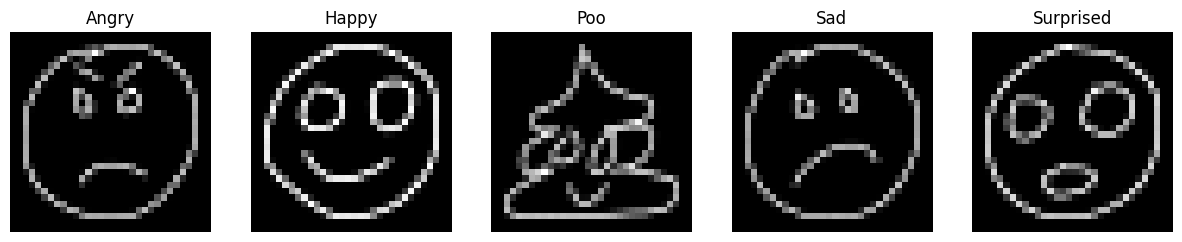

In [33]:
#Muestra una imgen de cada categoria
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, len(labels), figsize=(15, 5))
for i, label in enumerate(labels):
    for img, lbl in preprocessed_emojis:
        if lbl == label:
            axes[i].imshow(img, cmap='gray')
            axes[i].set_title(label)
            axes[i].axis('off')
            break
plt.show()


In [34]:
#Define la funcion que crea el modelo MLP con Keras
def create_mlp_model(input_shape, num_classes):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [35]:
# Entrena un modelo con los datos de entrenamiento
model = create_mlp_model(input_shape=1024, num_classes=5)
model.summary()
model.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)


c:\Users\amedi\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,781 (546.02 KB)

 Trainable params: 139,781 (546.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4935 - loss: 6.9189 - val_accuracy: 0.5457 - val_loss: 2.7356
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6973 - loss: 1.4163 - val_accuracy: 0.6469 - val_loss: 2.0204
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8159 - loss: 0.6067 - val_accuracy: 0.6272 - val_loss: 1.7593
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8894 - loss: 0.3225 - val_accuracy: 0.7037 - val_loss: 1.5909
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9333 - loss: 0.2157 - val_accuracy: 0.6988 - val_loss: 1.6928
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9531 - loss: 0.1376 - val_accuracy: 0.6642 - val_loss: 1.7339
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9549 - loss: 0.1454 - val_accuracy: 0.6889 - val_loss: 1.6832
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9765 - loss: 0.0910 - val_accuracy: 0.6988 - val_loss

In [36]:
#Evaluacion del modelo con los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)
print(classification_report(y_true_classes, y_pred_classes))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
              precision    recall  f1-score   support

           0       0.55      0.59      0.57       101
           1       0.66      0.76      0.71       102
           2       0.98      1.00      0.99       101
           3       0.57      0.56      0.57       101
           4       0.78      0.57      0.66       101

    accuracy                           0.70       506
   macro avg       0.71      0.70      0.70       506
weighted avg       0.71      0.70      0.70       506



#
Entrenamiento utilizando una CNN

In [38]:
#Preparación de Datos para la CNN

X_train_cnn = X_train.reshape(-1, 32, 32, 1)
X_test_cnn = X_test.reshape(-1, 32, 32, 1)

print("Forma de X_train para CNN:", X_train_cnn.shape)
print("Forma de X_test para CNN:", X_test_cnn.shape)
print("Forma de y_train para CNN:", y_train_cat.shape) 
print("Forma de y_test para CNN:", y_test_cat.shape) 

Forma de X_train para CNN: (2024, 32, 32, 1)
Forma de X_test para CNN: (506, 32, 32, 1)
Forma de y_train para CNN: (2024, 5)
Forma de y_test para CNN: (506, 5)


In [39]:
# Genera la función que crea el modelo CNN
def create_cnn(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [41]:
# Compila y entrena la CNN con los datos de entrenamiento
cnn_model = create_cnn(input_shape=(32, 32, 1), num_classes=5)
cnn_model.summary()
cnn_model.fit(X_train_cnn, y_train_cat, epochs=10, batch_size=32, validation_split=0.2, validation_data=(X_test_cnn, y_test_cat))

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,661 (651.02 KB)

 Trainable params: 166,661 (651.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5534 - loss: 3.1030 - val_accuracy: 0.7273 - val_loss: 0.7639
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8127 - loss: 0.5239 - val_accuracy: 0.8340 - val_loss: 0.4681
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8958 - loss: 0.2825 - val_accuracy: 0.8617 - val_loss: 0.3932
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9308 - loss: 0.1935 - val_accuracy: 0.8755 - val_loss: 0.3091
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9634 - loss: 0.1179 - val_accuracy: 0.8933 - val_loss: 0.3083
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9708 - loss: 0.0876 - val_accuracy: 0.8992 - val_loss: 0.3098
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9718 - loss: 0.0857 - val_accuracy: 0.8913 - val_loss: 0.3525
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9713 - loss: 0.0860 - val_accuracy: 0.9012 - v

In [42]:
# Evalúa la CNN con los datos de prueba
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_classes_cnn = np.argmax(y_pred_cnn, axis=1)
print(classification_report(y_true_classes, y_pred_classes_cnn))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       101
           1       0.93      0.97      0.95       102
           2       1.00      1.00      1.00       101
           3       0.87      0.76      0.81       101
           4       0.97      0.95      0.96       101

    accuracy                           0.91       506
   macro avg       0.91      0.91      0.91       506
weighted avg       0.91      0.91      0.91       506

